<a href="https://colab.research.google.com/github/esleylab/machinelearning/blob/main/learningtransfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

import os

#if using Theano with GPU
#os.environ["KERAS_BACKEND"] = "tensorflow"

import random
import numpy as np
import keras
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Model

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

import tensorflow_datasets as tfds

# Baixando o dataset Cats vs Dogs
dataset_name = "cats_vs_dogs"
data, info = tfds.load(dataset_name, as_supervised=True, with_info=True)

# Dividindo em treino e teste
train_data = data['train'].take(int(info.splits['train'].num_examples * 0.8)) # Seleciona 80% dos dados de treino
test_data = data['train'].skip(int(info.splits['train'].num_examples * 0.2)) # Skip 80% para selecionar os 20% restantes para teste
processed = False

# Informações do dataset
#print(info)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.238P5T_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


dog
dog
dog
cat
dog


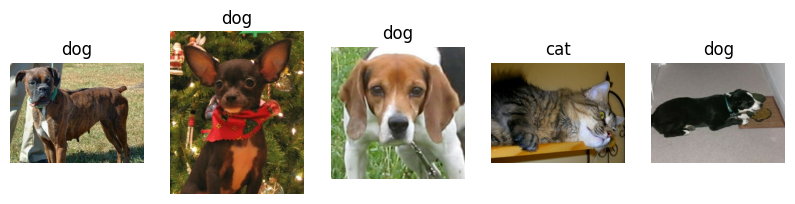

In [8]:
import tensorflow_datasets as tfds
import tensorflow as tf
import matplotlib.pyplot as plt

# Carregar o dataset
dataset_name = "cats_vs_dogs"
data, info = tfds.load(dataset_name, as_supervised=True, with_info=True)

# Visualizar as classes (0 = gato, 1 = cachorro)
classes = ['cat', 'dog']

# Função para mostrar algumas imagens
def show_images(dataset, num_images=5):
    plt.figure(figsize=(10, 10))

    for i, (image, label) in enumerate(dataset.take(num_images)):
        ax = plt.subplot(1, num_images, i + 1)
        ax.imshow(image)
        #print(classes[label.numpy()])
        ax.set_title(classes[label.numpy()])
        ax.axis("off")

    plt.show()

# Exibir 5 imagens do conjunto de treino
train_dataset = data['train']
show_images(train_dataset)



In [2]:
import tensorflow as tf

# Função de preprocessamento
def preprocess(image, label):
    image = tf.image.resize(image, (128, 128))  # Redimensiona para diminuir processamento
    image = image / 255.0  # Normaliza para o intervalo [0, 1]
    return image, label

# Aplicar preprocessamento e criar batches
if not processed:
  batch_size = 32
  train_data = train_data.map(preprocess).batch(batch_size).shuffle(1000)
  test_data = test_data.map(preprocess).batch(batch_size)
  processed = True #Controle para não processar 2x

# Visualizando um lote de imagens
import matplotlib.pyplot as plt

for images, labels in train_data.take(1):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title("Gato" if labels[i] == 0 else "Cachorro")
        plt.axis("off")
    plt.show()

NameError: name 'processed' is not defined

In [12]:
import os
from PIL import Image
import tensorflow as tf
import numpy as np

# Caminho da pasta onde as imagens serão salvas
base_dir = "./imagens/cats_dogs"
cats_dir = os.path.join(base_dir, 'cats')
dogs_dir = os.path.join(base_dir, 'dogs')
img_size=(128, 128)

# Criar os diretórios, se não existirem
os.makedirs(base_dir, exist_ok=True)
os.makedirs(cats_dir, exist_ok=True)
os.makedirs(dogs_dir, exist_ok=True)

def salvar_imagens(dataset, pasta_base):
    for i, (imagem, label) in enumerate(dataset.take(200)):  # Itera por todo o dataset
        # Redimensionar imagem para garantir que tenha tamanho adequado para salvar
        imagem = tf.image.resize(imagem, img_size)

        # Convert the image to uint8 before saving
        imagem = tf.cast(imagem * 255, dtype=tf.uint8) # Convert to uint8
        # Converter tensor para formato de imagem
        imagem_pil = Image.fromarray(imagem.numpy())  # Convertendo tensor para imagem PIL

        # Determinar a subpasta com base no rótulo
        subpasta = "cats" if label.numpy() == 0 else "dogs"
        caminho_pasta = os.path.join(pasta_base, subpasta)  # Criar a pasta 'cats' ou 'dogs'

        # Definir o nome e caminho do arquivo
        nome_arquivo = f"{subpasta}_{i}.jpg"
        caminho_arquivo = os.path.join(caminho_pasta, nome_arquivo)

        # Salvar a imagem
        imagem_pil.save(caminho_arquivo, "JPEG")

# Salvar imagens dos conjuntos de treino e teste
salvar_imagens(data['train'], base_dir)


In [11]:
import shutil

# Caminho da pasta que você deseja deletar
pasta_para_deletar = "/content/imagens/cats_dogs"
# Deletar a pasta e todo o seu conteúdo
try:
    shutil.rmtree(pasta_para_deletar)
    print(f"A pasta '{pasta_para_deletar}' foi deletada com sucesso.")
except FileNotFoundError:
    print(f"A pasta '{pasta_para_deletar}' não foi encontrada.")
except PermissionError:
    print(f"Sem permissão para deletar a pasta '{pasta_para_deletar}'.")
except Exception as e:
    print(f"Ocorreu um erro ao tentar deletar a pasta: {e}")


A pasta '/content/imagens/cats_dogs' foi deletada com sucesso.


In [4]:
import os
from PIL import Image
import numpy as np

# Caminho do diretório
base_dir = "/content/imagens/cats_dogs"

# Lista para armazenar os dados
new_train = []

# Percorrer cada categoria
for c, category in enumerate(categories):
    category_dir = os.path.join(base_dir)

    # Verificar se o diretório existe
    if not os.path.exists(category_dir):
        print(f"Diretório não encontrado: {category_dir}")
        continue

    # Listar as imagens na pasta
    for file_name in os.listdir(category_dir):
        # Caminho completo da imagem
        file_path = os.path.join(category_dir, file_name)

        # Verificar se o arquivo é uma imagem
        if os.path.splitext(file_name)[1].lower() in ['.jpg', '.png', '.jpeg']:
            try:
                # Abrir a imagem e converter para array NumPy
                img = Image.open(file_path).convert('RGB')
                img_array = np.array(img)

                # Adicionar ao vetor new_train
                new_train.append({'x': img_array, 'y': c})
            except Exception as e:
                print(f"Erro ao processar a imagem {file_path}: {e}")

# Verificar o resultado
print(f"Total de imagens carregadas: {len(new_train)}")

# Check if new_train is empty before accessing the first element
if new_train:
    print(f"Primeira entrada: {new_train[0]}")
else:
    print("A lista new_train está vazia. Nenhuma imagem foi carregada.")

Diretório não encontrado: /content/imagens/cats_dogs/cats
Diretório não encontrado: /content/imagens/cats_dogs/dogs
Total de imagens carregadas: 0
A lista new_train está vazia. Nenhuma imagem foi carregada.


In [1]:
import numpy as np

# Iterate through the dataset and extract images and labels
x_train, y_train = [], []
for images, labels in train_data:
    x_train.extend(images.numpy())  # Convert images to NumPy array
    y_train.extend(labels.numpy())  # Convert labels to NumPy array

# Convert lists to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

NameError: name 'train_data' is not defined

In [ ]:
x_test, y_test = [], []
for images, labels in test_data:
    x_test.extend(images.numpy())
    y_test.extend(labels.numpy())

# Convert lists to NumPy arrays
x_test = np.array(x_test)
y_test = np.array(y_test)

print(y_test)

In [ ]:
# normalize data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# convert labels to one-hot vectors
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_test.shape)